In [0]:
import os
import pandas as pd
import numpy as np
import random
import time
from random import seed
seed(time.time())
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
%cd gdrive/My\ Drive/Colab\ Notebooks/DataFiles/



[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/DataFiles/'
/content


In [0]:
def simulate(states, prob, nbeds, pop):
  it=0
  # pat = 0
  pded=0
  X=[0]
  Y=[0]
  ded=0
  while(it<120):
    # print("lala")
    it+=1
    pat=0
    npat = 0
    # ans=0
    # create infections from one to other
    for i in range(len(states)):
      s = list(states[i].shape)
      for j in range(s[0]):
        for k in range(s[1]):
          if states[i][j,k]>0:
            states[i][j,k]-=1
            # if states[i][j,k]==0:
              # ans+=1
    # print(ans)
    for i in range(len(states)):
    
      pat += len(list(zip(*np.where(states[i] > 0))))
      # print(pat)
      
      size = list(states[i].shape)
      # print(size)
      l = list(zip(*np.where((states[i] < 0)&(states[i]!=-10))))
      # print(l)
      for elem in l:
        val = states[i][elem[0], elem[1]]
        for x in range(3):
          for y in range(3):
            if (0 <= (elem[0] + x - 1) < size[0])&(0 <= (elem[1] + y - 1) < size[1]):
              
              # print(size)
              # print(elem[0]+x-1, elem[1]+y-1)
              if random.random() <= prob[i] and states[i][elem[0]+x-1, elem[1]+y-1] == 0:
                states[i][elem[0]+x-1, elem[1]+y-1] = min(-1, -5+it)
                
                
        if val == -1:
          # val=10
          npat+=1
        else: 
          val = val + 1
        states[i][elem[0], elem[1]]=val
        if random.random()<=0.05 and it>5 and val==-1:
          states[i][elem[0], elem[1]]=-10
          ded+=1
    X.append(it)
    Y.append(ded)

    normal = []
    for i in range(len(states)):
      # print(i)
      hp = list(zip(*np.where((states[i] <= 0) & (states[i]!=-10))))
      for j in hp:
        normal.append([i, j[0], j[1]])

    swap = int(pop/2000)
    if it<=5:
      swap=int(pop/5)
    for i in range(swap):    
      r1 = normal[random.randint(0, len(normal) -1)]
      r2 = normal[random.randint(0, len(normal)-1)]
      temp = states[r1[0]][r1[1], r1[2]]
      states[r1[0]][r1[1], r1[2]] = states[r2[0]][r2[1], r2[2]]
      states[r2[0]][r2[1], r2[2]] = temp
      
    
    
    # time.sleep(6)
    # pat += npat
    # print(pat)
    for i in range(len(states)):
      l=list(states[i].shape)
      for j in range(l[0]):
        for k in range(l[1]):
          if states[i][j, k]==-1 and pat<nbeds:
            states[i][j,k]=7
            pat+=1
            npat-=1

    # ded=0
    
    
    print(ded-pded, ded,pat, it)
    # Y.append(pded)
    pded=ded

  plt.plot(X, Y)
  plt.xlabel("ndays")
  plt.ylabel("deaths-total")

  plt.savefig("Assumption1-909100Lakh.jpg")


    


In [0]:
def sim(states, prob, nbeds, pop):
  it=0
  # pat = 0
  pded=0
  ded=0
  X=[0]
  state1=[0]
  state3=[0]
  state4=[0]
  state13=[0]
  state29=[0]
  while(it<40):
    # print("lala")
    it+=1
    print(it)
    pat=0
    npat = 0
    # ans=0
    # create infections from one to other
    for i in range(len(states)):
      s = list(states[i].shape)
      for j in range(s[0]):
        for k in range(s[1]):
          if states[i][j,k]>0:
            states[i][j,k]-=1
            # if states[i][j,k]==0:
              # ans+=1
    # print(ans)
    for i in range(len(states)):
    
      pat += len(list(zip(*np.where(states[i] > 0))))
      # print(pat)
      
      size = list(states[i].shape)
      # print(size)
      l = list(zip(*np.where((states[i] < 0)&(states[i]!=-10))))
      # print(l)
      for elem in l:
        val = states[i][elem[0], elem[1]]
        for x in range(3):
          for y in range(3):
            if (0 <= (elem[0] + x - 1) < size[0])&(0 <= (elem[1] + y - 1) < size[1]):
              
              # print(size)
              # print(elem[0]+x-1, elem[1]+y-1)
              if random.random() <= prob[i] and states[i][elem[0]+x-1, elem[1]+y-1] == 0:
                states[i][elem[0]+x-1, elem[1]+y-1] = -1
                
        if val == -1:
          # val=10
          npat+=1
        else: 
          val = val + 1
        states[i][elem[0], elem[1]]=val
        if random.random()<=0.05 and it>5 and val==-1:
          states[i][elem[0], elem[1]]=-10
          ded+=1
    X.append(it)
    # Y.append(ded)

    normal = []
    state1.append(len(list(zip(*np.where(states[0]==-10)))))
    state3.append(len(list(zip(*np.where(states[2]==-10)))))
    state4.append(len(list(zip(*np.where(states[3]==-10)))))
    state13.append(len(list(zip(*np.where(states[12]==-10)))))
    state29.append(len(list(zip(*np.where(states[28]==-10)))))
    for i in range(len(states)):
      # print(i)
      hp = list(zip(*np.where((states[i] <= 0) & (states[i]!=-10))))
      for j in hp:
        normal.append([i, j[0], j[1]])

    swap=0
    if it<=5:
      swaps=int(pop/5)
    for i in range(swap):    
      r=random.randint(0, len(states)-1)
      l = list(zip(*np.where(states[r]<=0)))
      e1=random.choice(l)
      e2=random.choice(l)
      temp = states[r][e1[0],e1[1]]
      states[r][e1[0],e1[1]]=states[r][e2[0], e2[1]]
      states[r][e2[0],e2[1]]=temp 
  
    
    
    # time.sleep(6)
    # pat += npat
    # print(pat)
    for i in range(len(states)):
      l=list(states[i].shape)
      for j in range(l[0]):
        for k in range(l[1]):
          if states[i][j, k]==-1 and pat<nbeds:
            states[i][j,k]=7
            pat+=1
            npat-=1

    # ded=0
    
    
    # print(ded-pded, ded,pat, it)
    # Y.append(pded)
    pded=ded

  # plt.plot(X, Y)
  # plt.xlabel("ndays")
  # plt.ylabel("deaths-per-day")

  # plt.savefig("1LakhInterState-case1.jpg")
  plt.plot(X, state3)
  
  plt.xlabel("ndays")
  plt.ylabel("ndeaths")
  plt.savefig("state6989intrastate1lakh__")
  
  

    


    


0 0 0 1
0 0 0 2
0 0 0 3
0 0 12 4
0 0 12 5
132 132 12 6
194 326 12 7
233 559 12 8
323 882 12 9
365 1247 12 10
427 1674 12 11
515 2189 12 12
619 2808 12 13
677 3485 12 14
709 4194 12 15
839 5033 12 16
853 5886 12 17
1018 6904 12 18
1159 8063 12 19
1291 9354 12 20
1299 10653 12 21
1354 12007 12 22
1531 13538 12 23
1646 15184 12 24
1792 16976 12 25
1852 18828 12 26
1887 20715 12 27
1970 22685 12 28
2040 24725 12 29
2199 26924 12 30
2215 29139 12 31
2167 31306 12 32
2424 33730 12 33
2415 36145 12 34
2352 38497 12 35
2389 40886 12 36
2449 43335 12 37
2392 45727 12 38
2459 48186 12 39
2464 50650 12 40
2501 53151 12 41
2517 55668 12 42
2406 58074 12 43
2446 60520 12 44
2389 62909 12 45
2490 65399 12 46
2459 67858 12 47
2337 70195 12 48
2343 72538 12 49
2313 74851 12 50
2370 77221 12 51
2303 79524 12 52
2271 81795 12 53
2254 84049 12 54
2222 86271 12 55
2117 88388 12 56
2086 90474 12 57
2105 92579 12 58
2176 94755 12 59
2009 96764 12 60
1994 98758 12 61
1929 100687 12 62
1910 102597 12 63
1905 

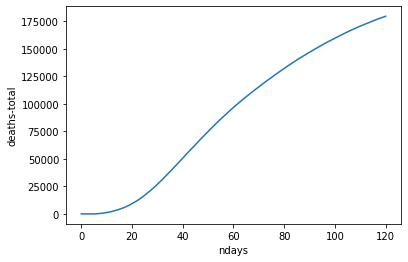

In [0]:
state = [
          [3702, 5000],
          [2370, 4000],
          [2150, 4000],
          [3770, 2000],
          [3000, 2000],
          [2980, 2000],
          [2830, 2000],
          [2525, 2000],
          [2445, 2000],
          [2040, 2000],
          [1735, 2000],
          [1445, 2000],
          [1380, 2000],
          [1365, 2000],
          [1290, 2000],
          [1837, 1250],
          [1688, 1250],
          [1672, 1250],
          [830, 1000],
          [570, 1000],
          [600, 500],
          [500, 500],
          [420, 500],
          [320, 500],
          [480, 250],
          [440, 250],
          [360, 250],
          [200, 250],
          [1390, 1000]
]
prob = [
        0.0825,
        0.0365,
        0.1102,
        0.1029,
        0.0230,
        0.0355,
        0.0201,
        0.0319,
        0.0308,
        0.0303,
        0.0369,
        0.0307,
        0.0859,
        0.0414,
        0.0397,
        0.0550,
        0.0189,
        0.0573,
        0.0189,
        0.0123,
        0.035,
        0.0132,
        0.0122,
        0.0119,
        0.0394,
        0.0017,
        0.0052,
        0.0086,
        1.00

]
# for total pop = 10^5

state_ = []
state__ = []
for i in range(len(state)):
  state_.append([int(state[i][0]/15), int(state[i][1]/30)])
  state__.append([int(state[i][0]/3), int(state[i][1]/3)])

states = arrays(state_, 10)
# print(prob)
# npp = 0
# for stat in states:
#   l = list(stat.shape)
#   npp += l[0]*l[1]
# print(npp)

# states[0] = np.where(states[0]>0, states[0]-1, states[0])
# print(len(list(zip(*np.where(states[0] > 0)))))
# print(len(list(zip(*np.where(states[0]<0)))))
simulate(states, prob, 12,100000)




In [0]:
def arrays(state, nppl):
  states = []
  for i in range(len(state)):
    arr = np.zeros([state[i][0], state[i][1]], dtype=int)
    for j in range(nppl):
      r = random.randint(0, state[i][0]-1)
      c = random.randint(0, state[i][1]-1)
      arr[r,c]=-5
    states.append(arr)
  return states

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
l=[]

for i in range(4):
  arr=np.zeros([4, 6], dtype=int)
  l.append(arr)

h(l)




In [0]:
def h(stat):
  for j in range(3):
    for i in range(len(stat)):
      stat[i]=np.where(stat[i]==0, stat[i]+1, stat[i]+2)

    print(stat)

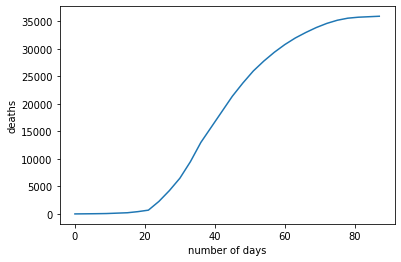

In [0]:
from scipy.signal import savgol_filter
Xaxis=[0, 0, 30, 49, 70, 149, 726, 1037, 1395, 8000, 10000, 12000, 16000, 19000, 22000, 24000, 26000, 28000, 30000, 31000, 32000, 33000, 34000, 35000, 35500, 35750, 35875, 35876, 35880]
Y=[0, 3, 6, 9, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87]
Xhat=savgol_filter(Xaxis, 5, 1)
plt.plot(Y, Xhat)
plt.xlabel("number of days")
plt.ylabel("deaths")
plt.savefig("10million.jpg")